In [2]:
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import glob

# Loading databases

In [8]:
# Take out the nan entries

def NanOff(df):
    new = pd.DataFrame(df)
    new = new.replace(np.nan,float('-1'))
    return new

In [9]:
# Number of entries array
Entries = np.array([])
EntriesCuts = np.array([])

DFrameArray = []
DFrameArrayCuts = []

FileNames = []

def OneDataFrame():
    
    for f in glob.glob('Databases/*.xls'):
        df = pd.read_excel(f,sheet_name='hoja1')
        df = NanOff(df) # TAKE OUT THE NAN ENTRIES
        
        DFrameArray.append(df)
        FileNames.append(f)
        
    dft = pd.concat(DFrameArray,ignore_index='True')
    
    return dft

In [10]:
# each element in DFrameArray is a dataframe for each section

# The index 4 contains all the information
DFrameArray.append(OneDataFrame())
DFrameArrayCuts = DFrameArray[:] #  Do slicing properly

print(id(DFrameArray))
print(id(DFrameArrayCuts))

140360137937552
140360137267896


In [11]:
Entries = np.array([])

for i in range(len(FileNames)+1):
    Entries = np.append(Entries, DFrameArray[i]['ID'].count())
    if i != 4:
        print(FileNames[i])
# Total entries in each group
print(Entries)

Databases/202110_10468_Lista de clase_16.xls
Databases/202110_39380_Lista de clase_17.xls
Databases/202110_39422_Lista de clase_19.xls
Databases/202110_39384_Lista de clase_18.xls
[23. 21. 20. 21. 85.]


In [12]:
DFrameArray[4].describe()

,ID,Nota1,A1,B1,C1,D1,E1,F1,Nota2,A2,B2,C2,D2,E2,F2
count,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0
mean,2.019522e+08,3.290588,0.672941,0.527059,0.272941,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
std,1.343301e+05,1.107617,0.180863,0.218974,0.308371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.014233e+08,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,2.019209e+08,2.500000,0.600000,0.500000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,2.020131e+08,3.500000,0.700000,0.500000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
75%,2.020211e+08,4.000000,0.800000,0.600000,0.500000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
max,2.021134e+08,5.000000,1.000000,1.000000,1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


# Descriptive Statistics

In [13]:
Names = ['Nota','A','B','C']

NNotas = 1

DictMean = {}
DictStd = {}

for i in Names:  # Cathegories
    
    for j in range(1,NNotas+1): # Grades
        
        Name_ = i + str(j)
        
        print('Calculating for: '+Name_)

        Mean = np.array([])
        Std = np.array([])


        for k in range(len(FileNames)+1):
            Mean = np.append(Mean,np.average(DFrameArray[k][Name_]))
            Std = np.append(Std,np.std(DFrameArray[k][Name_]))
        
        DictMean[Name_] = Mean
        DictStd[Name_] = Std

Calculating for: Nota1
Calculating for: A1
Calculating for: B1
Calculating for: C1


In [14]:
# Print Dictionaries

for i in DictMean.keys():
    print(i+':')
    print(DictMean[i])
    print(DictStd[i])

A1:
[0.6        0.67142857 0.66       0.76666667 0.67294118]
[0.18177865 0.18553105 0.19595918 0.0942809  0.17979612]
C1:
[0.26521739 0.30952381 0.225      0.29047619 0.27294118]
[0.30872627 0.31305676 0.3284433  0.2670915  0.3065513 ]
Nota1:
[2.67391304 3.5047619  3.365      3.68095238 3.29058824]
[1.14785902 1.00828765 1.23502024 0.6122706  1.1010822 ]
B1:
[0.46521739 0.52380952 0.56       0.56666667 0.52705882]
[0.2883366  0.14769583 0.23537205 0.13915847 0.21768203]


# Cuts

In [36]:
def GetCuts(Cuts_):
    
    EntriesCuts = np.array([])
    
    Keys = Cuts_.keys()
    Values = Cuts_.values()
    
    for i in range(len(FileNames)+1):
    
        # Set of cuts
        Cut0 = DFrameArray[i][Keys[0]] >= Values[0]
        Cut1 = DFrameArray[i][Keys[1]] >= Values[1]
        Cut2 = DFrameArray[i][Keys[2]] >= Values[2]
    
        DFrameArrayCuts[i] = DFrameArray[i][(Cut0) & (Cut1) & (Cut2)]    
        # Get the new number of entries
        EntriesCuts = np.append(EntriesCuts, DFrameArrayCuts[i]['ID'].count())


    # Array of efficiencies
    Efficiencies = EntriesCuts/Entries

    #Testing 
    #print(EntriesCuts, Entries)
        
    return Efficiencies

In [39]:
Cuts = {'Nota1':3.0, 'A1':0.5, 'B1': 0.6}
Efficiencies = GetCuts(Cuts)
print(Efficiencies)

# Closure Test
for i in range(len(FileNames)+1):
    print(DFrameArrayCuts[i]['ID'].count())

print(Entries)

[0.34782609 0.28571429 0.45       0.38095238 0.36470588]
8
6
9
8
31
[23. 21. 20. 21. 85.]


# Plotting

In [9]:
def CreateGroupFig(grupo, variable):
    
    fig = plt.figure(figsize=(10,10))

    ax1 = fig.add_subplot(2,2,1)
    ax1 = DFrameArray[0].groupby(grupo)[variable].sum().plot(kind='bar')
    #ax1.set_xlabel(grupo, fontsize=12)
    ax1.set_ylabel(variable, fontsize=12)

    ax2 = fig.add_subplot(2,2,2)
    ax2 = DFrameArray[1].groupby(grupo)[variable].sum().plot(kind='bar')
    #ax2.set_xlabel(grupo, fontsize=12)
    #ax2.set_ylabel(variable, fontsize=12)

    ax3 = fig.add_subplot(2,2,3)
    ax3 = DFrameArray[2].groupby(grupo)[variable].sum().plot(kind='bar')
    ax3.set_xlabel(grupo, fontsize=12)
    ax3.set_ylabel(variable, fontsize=12)

    ax4 = fig.add_subplot(2,2,4)
    ax4 = DFrameArray[3].groupby(grupo)[variable].sum().plot(kind='bar')
    ax4.set_xlabel(grupo, fontsize=12)
    #ax4.set_ylabel(variable, fontsize=12)

    plt.savefig('Figures/'+grupo+'_'+variable+'.pdf',dpi=100,bbox_inches='tight')
    plt.close()

    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(1,1,1)
    ax1 = dft.groupby(grupo)[variable].sum().plot(kind='bar')
    ax1.set_xlabel(grupo, fontsize=12)
    ax1.set_ylabel(variable, fontsize=12)
    
    plt.savefig('Figures/'+grupo+'_'+variable+'T.pdf',dpi=100,bbox_inches='tight')
    plt.close()


In [10]:
# Plotting using group by

grupo = 'ID'  # Variable que agrupa

for i in Names:  # Cathegories
    
    for j in range(1,NNotas+1): # Grades
        
        Name_ = i + str(j)
        
        print('-- Calculating ---', Name_)
        
        CreateGroupFig(grupo,Name_)

('-- Calculating ---', 'Nota1')
('-- Calculating ---', 'A1')
('-- Calculating ---', 'B1')
('-- Calculating ---', 'C1')


In [11]:
# Uso de filtros por columna
#DFrameArray[0].filter(items=['ID','A1','A2'])
#DFrameArray[1].filter(like='A',axis=1)


# Seleccion por filar
#DFrameArray[2].set_index('A1')

#print(DFrameArray[2].loc[0:3])
#print(DFrameArray[2].iloc[:,0:2])

#print(DFrameArray[0]['Nota1'])
#print(dft['A1'])

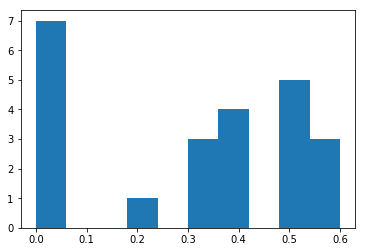

In [12]:
plt.hist(dft['B1'])
#plt.hist(DFrameArray[0]['Nota1'], density = True)
plt.show()

In [13]:
# Agregar columna

Sum = 0

for i in range(1,2):
    Sum += DFrameArray[0]['A'+str(i)]

dtest = DFrameArray[0].assign(NotaFinal=Sum.values)
print(dtest)

                                Nombre         ID  Nota1   A1   B1   C1   D1  \
2             GOMEZ TOSCANO, ANA MARIA  202021204    2.0  0.6  0.2  0.0 -1.0   
4     LEYTON LOPEZ, FERNANDA VALENTINA  202111884    2.5  0.6  0.6  0.4 -1.0   
6        MORENO SUAREZ, DORIS NATHALIA  201820035    1.5  0.6  0.0  0.0 -1.0   
7         SANCHEZ PAZOS, CAMILO ANDRES  202113026    2.5  0.5  0.3  0.5 -1.0   
8         VANEGAS ESCOBAR, JUAN FELIPE  202113279    2.0  0.3  0.5  0.5 -1.0   
9              VERA ANAYA, MARIA PAULA  202113340    2.0  0.6  0.3  0.0 -1.0   
10        ZAMORA CORTES, DAVID ERNESTO  202113407    1.5  0.3  0.3  0.0 -1.0   
11          CARDENAS BARRAGAN, NATALIA  201423256    1.0  0.3  0.0  0.0 -1.0   
13                FINO VILLAMIL, LAURA  202012077    2.0  0.5  0.4  0.0 -1.0   
14        GALINDO MORENO, PAULA ANDREA  202012135    2.0  0.5  0.4  0.0 -1.0   
16          HERNANDEZ PEREZ, ELIZABETH  202012365    2.0  0.6  0.5  0.0 -1.0   
18    PULIDO MARTINEZ, DIEGO ALEJANDRO  

In [14]:
# Mirar posicion
print(dtest.iat[0,1])
# Cambiar posicion
##dtest.iat[0,1] = 3.
#print(dtest)


# Agregar columna o fila 
#dtest.loc['Suma x columna'] = dtest.sum(axis=0)
#dtest.loc[:,'Suma x Renglon'] = dtest.sum(axis=1)
#print(dtest)

202021204


In [15]:
#Select the information by columns
for i in range(1,2):
    print(DFrameArray[2]['A'+str(i)])

1     0.6
8     0.5
11    0.6
13    0.0
16    0.6
Name: A1, dtype: float64


In [16]:
# Vamos a hacer corte

print(DFrameArray[2][DFrameArray[2]['A1']<0.7])
A1 = DFrameArray[2]['A1']
A1 = np.array(A1)
print(A1)

                               Nombre         ID  Nota1   A1   B1   C1   D1  \
1       BARRERA GUEVARA, AURA NATALIA  202011469    2.0  0.6  0.0  0.0 -1.0   
8     LEMUS MOSQUERA, MARIA VALENTINA  202021371    2.0  0.5  0.5  0.0 -1.0   
11       MORENO BERNAL, LAURA DANIELA  202021602    2.0  0.6  0.6  0.0 -1.0   
13  SERRANO GALLEGO, SANTIAGO EDUARDO  202013634    0.0  0.0  0.0  0.0 -1.0   
16       URREA RODRIGUEZ, JUAN ANDRES  201820242    2.5  0.6  0.5  0.0 -1.0   

     E1   F1  Nota2   A2   B2   C2   D2   E2   F2  
1  -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
8  -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
11 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
13 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
16 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
[0.6 0.5 0.6 0.  0.6]


0.6    5
0.3    4
0.5    4
0.8    1
Name: A1, dtype: int64


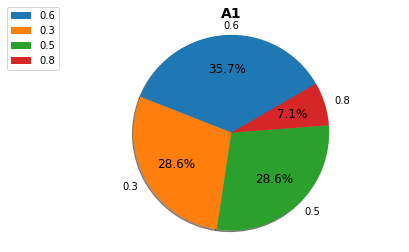

In [17]:
# Plotting pies


sizes = DFrameArray[0]['A1'].value_counts()
print(sizes)
pie = DFrameArray[0]['A1'].value_counts().plot(kind='pie', shadow=True,\
                                              autopct='%1.1f%%', startangle=30,\
                                              radius=1.5,center=(0.5,0.5),\
                                              textprops={'fontsize':12},frame=False,\
                                              pctdistance=0.65)
pie.set_ylabel('')
pie.set_xlabel('')


labels=sizes.index.unique()
plt.gca().axis('equal')
plt.title(DFrameArray[0].columns[3], weight='bold',size=14)
plt.legend(labels, bbox_to_anchor=(0.,1.1))


plt.savefig('Figures/A1.pdf',dpi=100,bbox_inches='tight')


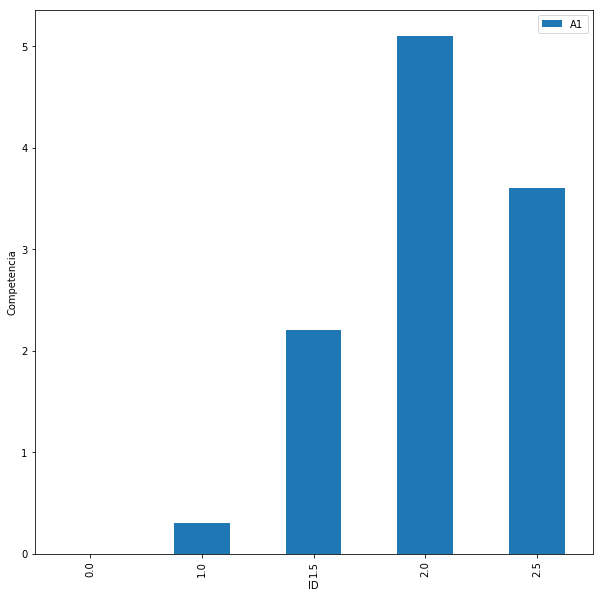

In [18]:
# plotting using group by

fig = plt.figure(figsize=(10,10))

dft.groupby('Nota1')['A1'].sum().plot(kind='bar',legend='Reverse')
#DFrameArray[1].groupby('Nota1')['A1'].sum().plot(kind='bar',legend='Reverse')

plt.xlabel('ID')
plt.ylabel('Competencia')
plt.savefig('Figures/A1Bars.pdf',dpi=100,bbox_inches='tight')

ValueError: pie doesn't allow negative values

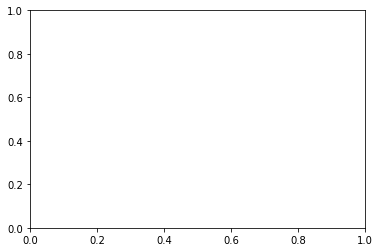

In [19]:
fig = plt.figure()

DFrameArray[2].A2.groupby(DFrameArray[2].ID).sum().plot(kind='pie',cmap='viridis')
plt.axis('equal')
plt.ylabel('')
plt.savefig('Figures/A1Pie.pdf',dpi=100,bbox_inches='tight')

In [ ]:
#fig = plt.figure()
sns.lmplot(x='ID',y='A1',data=DFrameArray[2],fit_reg=False,hue='ID',legend=False,palette='viridis')
#plt.savefig('Figures/A1seaborn.pdf',dpi=100,bbox_inches='tight')

In [ ]:
#sns.set(style='ticks', color_codes=True)
#g = sns.pairplot(DFrameArray[2], hue='ID', palette='Spectral')

In [ ]:
print(dft['A2'])

In [ ]:
# Write the whole dataframe in an excel file


output = pd.ExcelWriter('DataBaseFisicaI.xls')
dft.to_excel(output,'Hoja1')
output.save()